In [1]:
import pygkls
import numpy as np
import matplotlib.pyplot as plt
import cma
from SBS import SBS

In [2]:
nf = np.random.randint(1, 100)
pygkls.init(nf=nf, num_minima=50, domain_lo=-10, domain_hi=10, global_value=-10)

0

Text(0.5, 0.92, 'GKLS function no. 81')

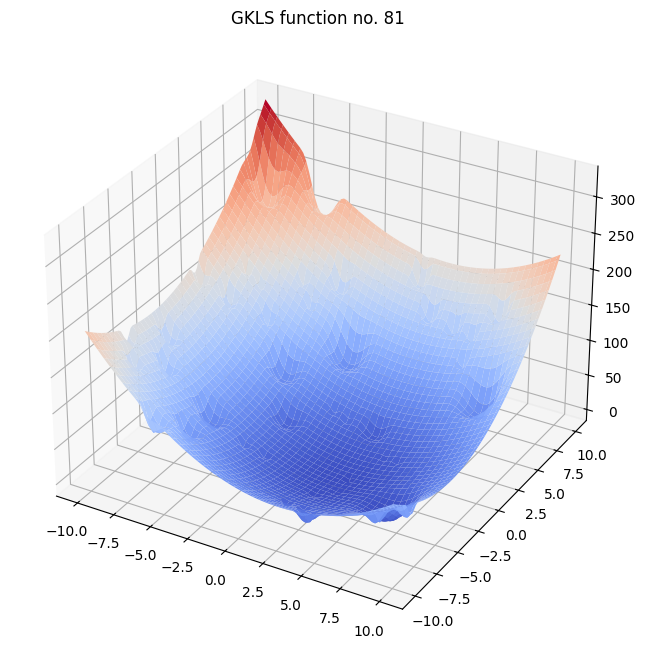

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = [pygkls.get_d2_f([X[i, j], Y[i, j]]) for i in range(100) for j in range(100)]

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d", computed_zorder=False)
ax.plot_surface(X, Y, np.array(Z).reshape(100, 100), cmap="coolwarm")
ax.set_title(f"GKLS function no. {nf}")

In [4]:
xopt, es = cma.fmin2(
  pygkls.get_d2_f,
  [0] * 2,
  5,
  {"bounds": [[-8, -8], [8, 8]], "tolx": 1e-20, "tolfun": 1e-20, "tolfunhist": 1e-20}
)
print(es.best.f)

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=837141, Thu Jul 11 12:41:36 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.097134201578277e-01 1.0e+00 5.94e+00  5e+00  5e+00 0:00.0
    2     12 2.423761297937872e+00 1.5e+00 8.42e+00  5e+00  5e+00 0:00.0
    3     18 5.921088273361159e+00 2.4e+00 6.15e+00  3e+00  4e+00 0:00.0
   95    570 -1.000000000000000e+01 1.5e+00 8.22e-05  2e-08  3e-08 0:00.0
termination on tolflatfitness=1 (Thu Jul 11 12:41:36 2024)
final/bestever f-value = -1.000000e+01 -1.000000e+01 after 571/490 evaluations
incumbent solution: [2.8462269295558436, -2.5219580964097297]
std deviation: [1.528159281082149e-08, 2.5097308750801136e-08]
-10.0


In [5]:
n_particles = 50

sbs = SBS(
  np.array([[-10, 10], [-10, 10]]),
  n_particles=n_particles,
  k_iter=[1],
  svgd_iter=100,
  sigma=1e-5,
  lr=0.1
)

(bp, bf), ap, af = sbs.optimize(pygkls.get_d2_f)

print(bf)

-9.998488794998613


Text(0.5, 0.92, 'GKLS function no. 81')

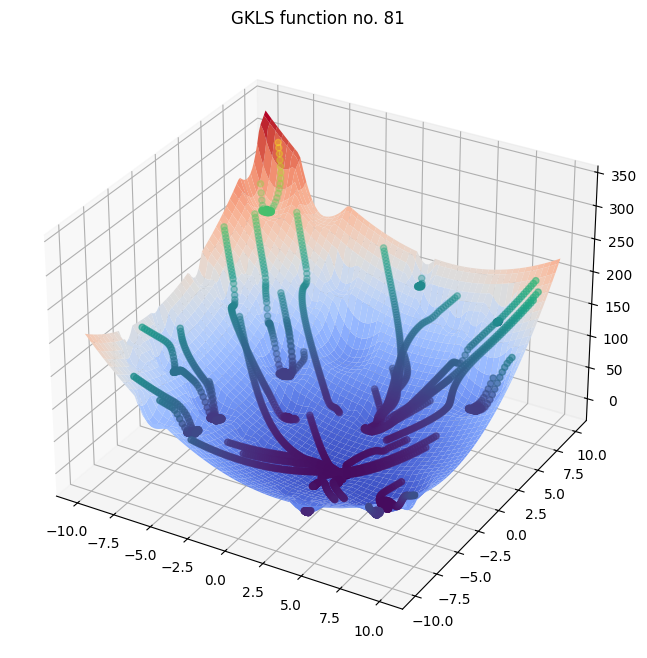

In [6]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = [pygkls.get_nd_f([X[i, j], Y[i, j]]) for i in range(100) for j in range(100)]

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d", computed_zorder=False)
ax.plot_surface(X, Y, np.array(Z).reshape(100, 100), cmap="coolwarm", antialiased=True, zorder=4.4)

ax.scatter(ap[n_particles:, 0], ap[n_particles:, 1], af, c=af, cmap="viridis", zorder=4.5)
ax.set_title(f"GKLS function no. {nf}")